In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.3018 - loss: 1.0994 - val_accuracy: 0.3333 - val_loss: 1.0979
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.3816 - loss: 1.0973 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.3061 - loss: 1.1003 - val_accuracy: 0.3333 - val_loss: 1.0971
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.3633 - loss: 1.0964 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.3592 - loss: 1.0982 - val_accuracy: 0.3333 - val_loss: 1.0998
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.3455 - loss: 1.0982 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.2826 - loss: 1.0975 - val_accuracy: 0.3333 - val_loss: 1.0973
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.3415 - loss: 1.0990 - val_accuracy: 0.3333 - val_loss: 1.0989
Epo

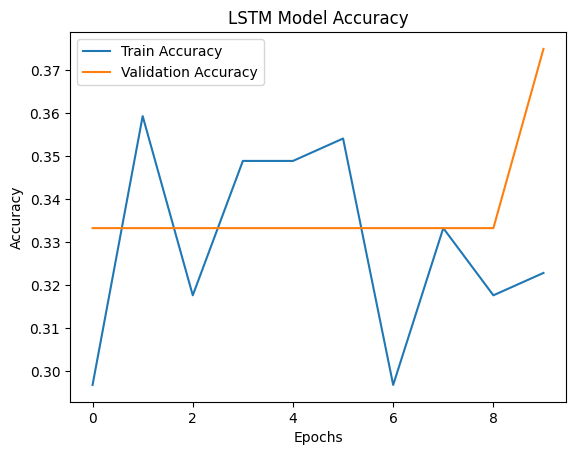

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('/content/drive/MyDrive/Customer_Reviews.csv')

# Step 2: Encode target variable
encoder = LabelEncoder()
df['Sentiment_Label'] = encoder.fit_transform(df['Sentiment'])

# Step 3: Tokenize text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review_Text'])
sequences = tokenizer.texts_to_sequences(df['Review_Text'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Step 4: Split data
X_train, X_test, y_train, y_test = train_test_split(padded, df['Sentiment_Label'], test_size=0.2, random_state=42)

# Step 5: Build LSTM model
model = Sequential([
    Embedding(5000, 64, input_length=100),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, verbose=1)

# Step 7: Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.3f}")

# Step 8: Plot performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()